# How to find optimal parameters using GridSearchCV


Grid Search took 205.2770013809204 seconds.

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=1000,
                           subsample=0.2)

 The best score across ALL searched params:
 0.9925373134328358

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.2}

 The classification report for the model is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.89      0.94        18
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45




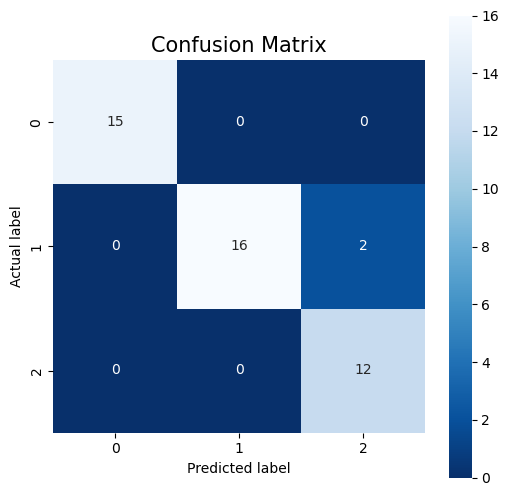

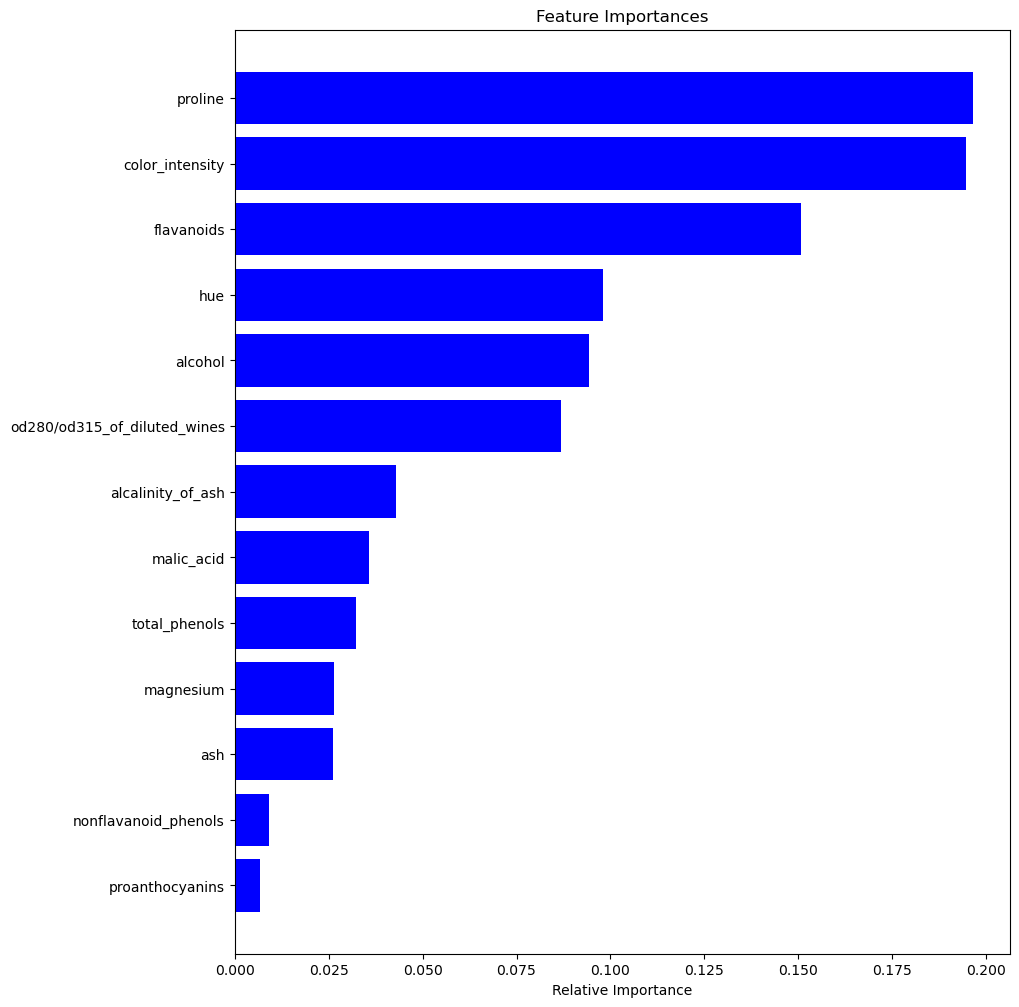

In [2]:
import time
import warnings
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
warnings.filterwarnings("ignore")

def optimize_model(model, parameters, X, y):
    """
    This function performs hyperparameter tuning on the given model using GridSearchCV and prints the best parameters.
    """
    # Split the data into training and testing sets
    # Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

    # Perform grid search on the classifier using 'scorer' as the scoring method
    grid_obj = GridSearchCV(model, parameters, cv=2, n_jobs=-1)

    # Fit the grid search object to the training data and find the optimal parameters
    start = time.time()
    grid_fit = grid_obj.fit(X_train, y_train)
    end = time.time()
    
    print(f"\nGrid Search took {end - start} seconds.")

    # Get the estimator and predict
    best_model = grid_fit.best_estimator_
    best_predictions = best_model.predict(X_test)

    # Print the results 
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    print("\n The best estimator across ALL searched params:\n",
          grid_fit.best_estimator_)
    print("\n The best score across ALL searched params:\n",
          grid_fit.best_score_)
    print("\n The best parameters across ALL searched params:\n",
          grid_fit.best_params_)
    print("\n The classification report for the model is:\n",
          classification_report(y_test, best_predictions))
    print("\n ========================================================")
    
    # Visualization of Confusion Matrix and feature importance
    # Confusion matrix
    conf_mat = confusion_matrix(y_test, best_predictions)
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_mat, annot=True, fmt=".0f", square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title('Confusion Matrix', size = 15);
    plt.show()
    
    # Feature importance
    feature_imp = best_model.feature_importances_
    indices = np.argsort(feature_imp)
    features = wine_dataset.feature_names

    plt.figure(figsize=(10, 12))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), feature_imp[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Load wine dataset
wine_dataset = datasets.load_wine()
X = wine_dataset.data
y = wine_dataset.target

# Define the model (Gradient Boosting Classifier)
gb_classifier = GradientBoostingClassifier()

# Define the parameters for exploration
param_grid = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8] 
             }

# Call the function optimize_model
optimize_model(gb_classifier, param_grid, X, y)
